# Departamento de marketing

- Dados: https://www.kaggle.com/arjunbhasin2013/ccdata



## Importação das bibliotecas e base de dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
creditcard_df = pd.read_csv('/content/Marketing_data.csv')

**Atributos da base de dados - Lista de clientes de cartão de crédito**

• # CUSTID: Identificação do cliente

• # BALANCE: Saldo para fazer compras

• # BALANCE_FREQUENCY: Frequência que o saldo é atualizado (1 = frequente, 0
= não frequente)

• # PURCHASES: Quantidade de compras realizadas

• # ONEOFFPURCHASES: Quantidade de compras feitas “de uma só vez” (sem
parcelar)

• # INSTALLMENTS_PURCHASES: Quantidade de compras parceladas

• # CASH_ADVANCE: Dinheiro adiantado

• # PURCHASES_FREQUENCY: Frequência das compras (entre 1 e 0)

• # ONEOFF_PURCHASES_FREQUENCY: Frequência de compras à vista (entre 1 e
0)

• # PURCHASES_INSTALLMENTS_FREQUENCY: Frequência de compras parceladas
(entre 1 e 0)

• # CASH_ADVANCE_FREQUENCY: Frequência de saques de dinheiro adiantado

• # CASH_ADVANCE_TRX: Número de transações feitas como "Cash in Advance"

• # PURCHASES_TRX: Número de compras

• # CREDIT_LIMIT: Limite do cartão de crédito

• # PAYMENTS: Valor pago

• # MINIMUM_PAYMENTS: Valor mínimo pago

• # PRC_FULL_PAYMENT: Percentual de pagamentos da fatura “completa”

• # TENURE: Posse do titular do cartão

In [3]:
creditcard_df.shape

(8950, 18)

In [4]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [7]:
# Cliente que fez a maior compra à vista

creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [9]:
# Cliente com maior saque do limite do cartão de crédito

creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE


Nesta análise preliminar, dos dois exemplos de clientes anteriores, podemos notar 2 possíveis grupos dado os seus comportamentos de uso do cartão, onde o primeiro utiliza mais o cartão para compras enquanto que o segundo utiliza mais para efetuar saques do limite.

## Visualização e exploração dos dados

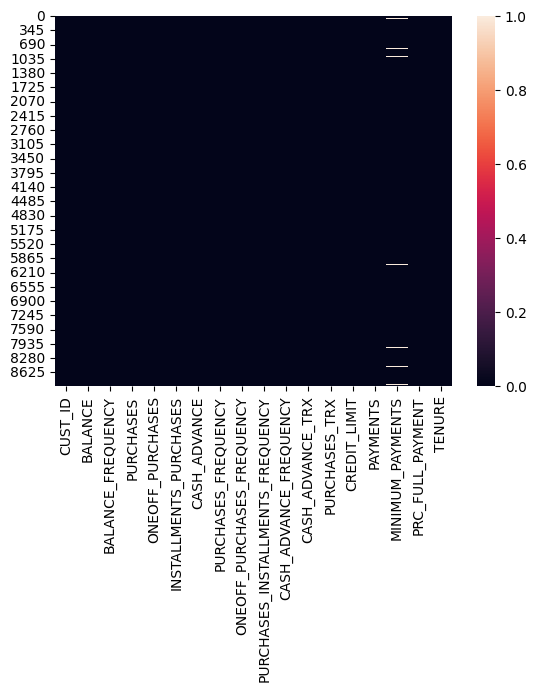

In [10]:
# Visualizando a existência de valores nulos - barrinhas brancas no mapa de calor

sns.heatmap(creditcard_df.isnull());

In [11]:
# Visualizando a soma de valores nulos por atributo

creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
# Decidi preencher os valores nulos de pagamentos mínimos com sua média
# Obtendo a média

mean_minimum_payments = creditcard_df['MINIMUM_PAYMENTS'].mean()
mean_minimum_payments

864.2065423050828

In [13]:
creditcard_df['MINIMUM_PAYMENTS'].fillna(mean_minimum_payments, inplace=True)

In [14]:
# Outra forma de preencher valores nulos
# creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()

In [15]:
# Decidi preencher os valores nulos de de limite de crédio com sua média

mean_credit_limit = creditcard_df['CREDIT_LIMIT'].mean()
mean_credit_limit

4494.449450364621

In [16]:
creditcard_df['CREDIT_LIMIT'].fillna(mean_credit_limit, inplace=True)

In [17]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

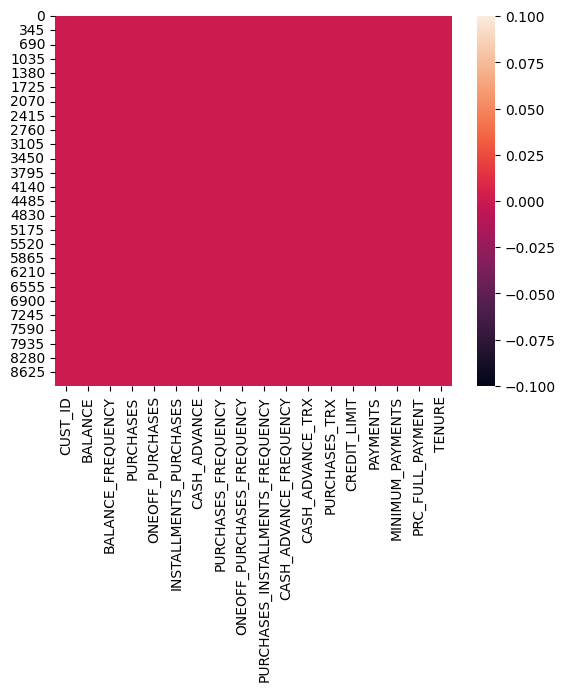

In [18]:
sns.heatmap(creditcard_df.isnull());

In [19]:
# Verificando existência de clientes repetidos

creditcard_df.duplicated().sum()

0

In [20]:
# Excluindo atributo de id dos clientes
# Não é relevante para o algoritmo de agrupamento que vou utilizar

creditcard_df.drop('CUST_ID', axis = 1, inplace = True)

In [21]:
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
# Lista de colunas do dataframe

creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [23]:
# Quantidade de colunas do dataframe

len(creditcard_df.columns)

17

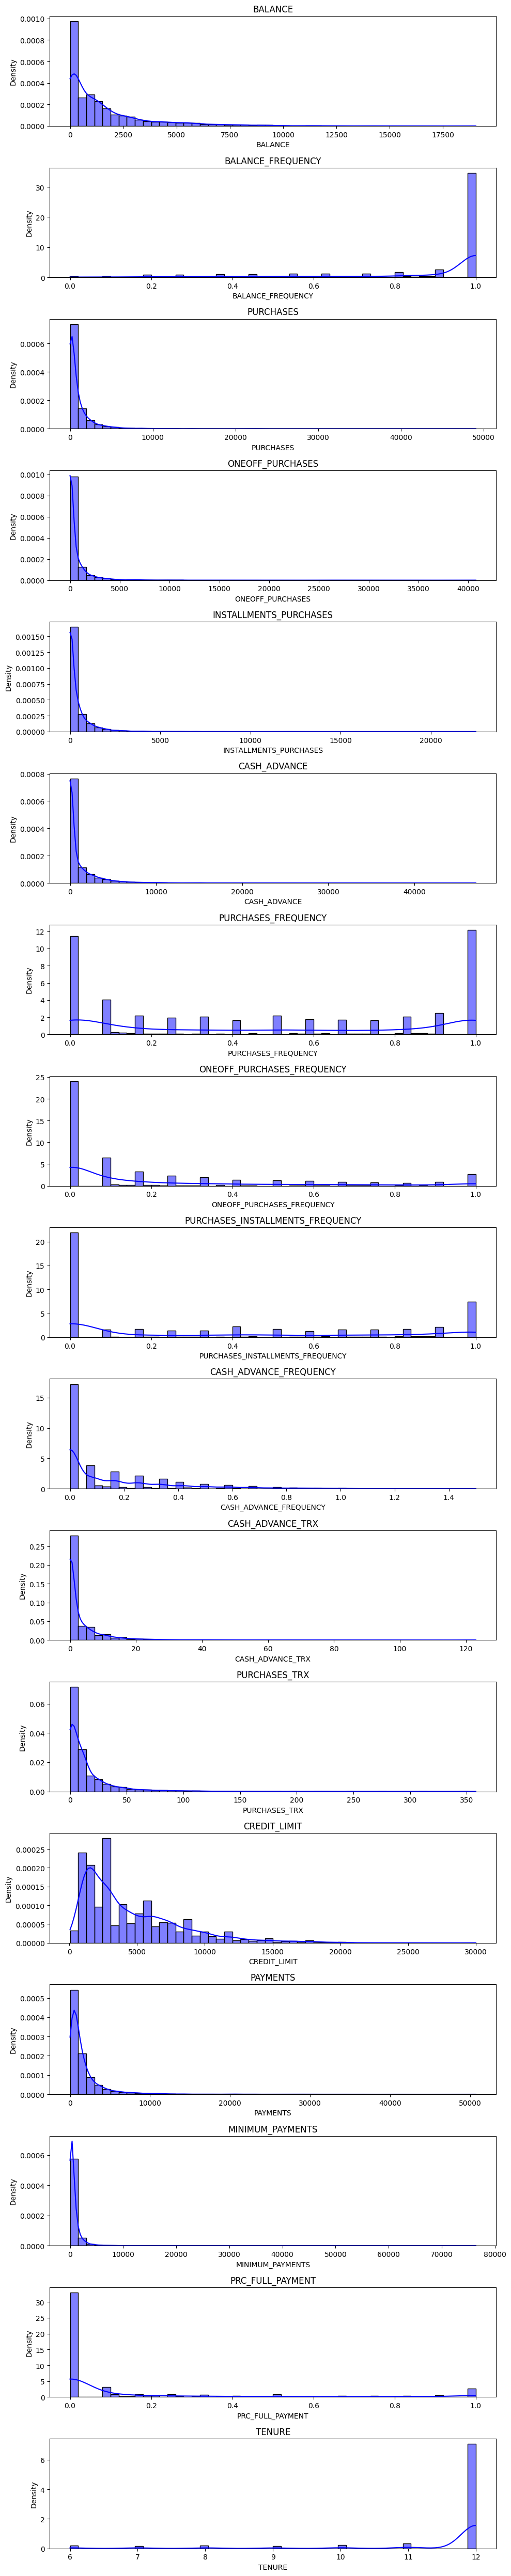

In [24]:
# Gerando gráficos de distribuição por atributo


plt.figure(figsize=(10, 50))
for i, column in enumerate(creditcard_df.columns):
    plt.subplot(17, 1, i + 1)
    sns.histplot(creditcard_df[column], bins=50, kde=True, stat='density', color='blue')
    plt.title(column)

plt.tight_layout()
plt.show();

In [25]:
correlations = creditcard_df.corr()

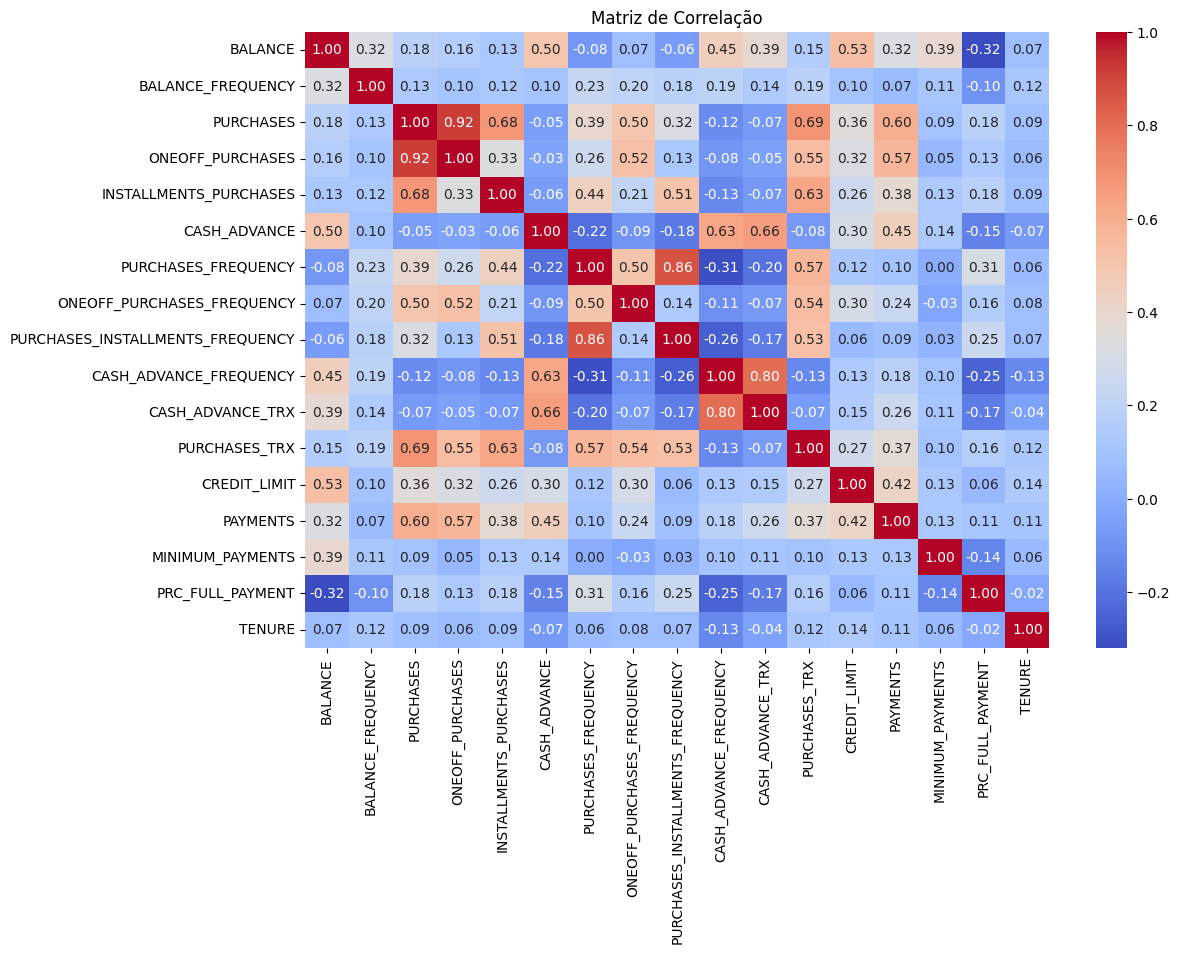

In [26]:
# Analisando força de correlação entre os atributos

plt.figure(figsize=(12, 8))
sns.heatmap(correlations, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

## Padronização Standard Scaler

In [27]:
# Verificando mínimos e máximos do atributo saldo

min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])

(0.0, 19043.13856)

In [28]:
# Normalizando por padronização as escalas dos atributos
# Muito importante para algoritmos que calculam distâncias

scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

**StandardScaler (Padronização):**

Transforma os dados de forma que a média seja 0 e o desvio padrão seja 1.
Adequado quando os dados seguem uma distribuição normal ou aproximadamente normal.
É menos sensível a outliers, pois não depende dos valores mínimos e máximos dos dados.
Pode resultar em valores negativos e positivos.
A escala dos dados é controlada pelas unidades de desvio padrão.

In [29]:
# Ao utilizar o scaler o tipo da base de dados muda

type(creditcard_df_scaled), type(creditcard_df)

(numpy.ndarray, pandas.core.frame.DataFrame)

In [30]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])

(-0.9604333444542572, 0.36067954425377496)

In [31]:
creditcard_df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## Aplicação de autoencoders

In [55]:
# Redução de 17 para 10 atributos
# Aplicar o Elbow + Silhouette
# Aplicar o K-means
# Aplicar o PCA

In [33]:
# Camadas de neurônios: 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [34]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)

In [35]:
# autoencoder
autoencoder = Model(input_df, decoded)

In [36]:
# encoder
encoder = Model(input_df, encoded)

In [37]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [38]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)

Epoch 1/50
280/280 [==============================] - 16s 52ms/step - loss: 0.1697
Epoch 2/50
280/280 [==============================] - 15s 54ms/step - loss: 0.0675
Epoch 3/50
280/280 [==============================] - 14s 51ms/step - loss: 0.0515
Epoch 4/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0375
Epoch 5/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0361
Epoch 6/50
280/280 [==============================] - 9s 33ms/step - loss: 0.0399
Epoch 7/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0445
Epoch 8/50
280/280 [==============================] - 9s 30ms/step - loss: 0.0310
Epoch 9/50
280/280 [==============================] - 9s 34ms/step - loss: 0.0418
Epoch 10/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0261
Epoch 11/50
280/280 [==============================] - 9s 34ms/step - loss: 0.0242
Epoch 12/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0184
Epoch 13/5

In [39]:
creditcard_decoded = autoencoder.predict(creditcard_df_scaled)

280/280 [==============================] - 2s 7ms/step


In [40]:
# Compactando a base de dados para 10 atributos

compact = encoder.predict(creditcard_df_scaled)

280/280 [==============================] - 1s 4ms/step


In [41]:
compact.shape

(8950, 10)

## Análise de perda de informação (entropia)

A entropia é uma medida que quantifica a incerteza ou a desordem em um conjunto de dados. No contexto da teoria da informação, a entropia de Shannon é comumente utilizada para medir a quantidade média de informação contida em uma distribuição de probabilidade.

In [42]:
# Análise de perda de informação na compactação do autoencoder
# Por questões didáticas decidi criar manualmente a função que calcula a entropia
# Existe função pronta na biblioteca scipy (stats.entropy)

import collections

def entropy(data):
  """
  Calcula a entropia de um array de dados.

  Args:
    data: O array de dados.

  Returns:
    A entropia do array de dados.
  """

  # Calcular a probabilidade de cada valor no array de dados.
  probabilities = np.array([float(collections.Counter(data)[i]) / len(data) for i in set(data)])

  # Calcular a entropia usando a fórmula de Shannon.
  entropy = -np.sum(probabilities * np.log2(probabilities))

  return entropy

In [43]:
# Calcular a entropia dos dados originais
entropy_original = np.mean(np.apply_along_axis(entropy, 1, creditcard_df_scaled))

# Calcular a entropia dos dados decodificados
entropy_encoded = np.mean(np.apply_along_axis(entropy, 1, compact))

# Calcular a perda de informação
loss_information = entropy_original - entropy_encoded

# Calcular a taxa de perda de informação
rate_loss_information = loss_information / entropy_original

In [44]:
# Imprimir os resultados
print("Entropia original:", entropy_original)
print("Entropia encoded:", entropy_encoded)
print("Perda de informação:", loss_information)
print("Taxa de perda de informação:", rate_loss_information)

Entropia original: 4.087462841250341
Entropia encoded: 3.234190348547732
Perda de informação: 0.853272492702609
Taxa de perda de informação: 0.20875357791426327


Os resultados impressos mostram a entropia dos dados originais, a entropia dos dados decodificados, a perda de informação absoluta e a taxa de perda de informação. Essas métricas fornecem insights sobre como o autoencoder está lidando com a informação durante o processo de compactação. Valores mais baixos indicam uma melhor preservação da informação, enquanto valores mais altos indicam uma maior perda de informação durante a compactação.



##Definição do número de clusters usando o método do Elbow Method + Silhouette Score

In [45]:
# Testando quantidades de grupos - Elbow Method

wcss_1 = []
range_values = range(1, 20)
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(creditcard_df_scaled)
    wcss_1.append(kmeans.inertia_)

In [46]:
print(wcss_1)

[152149.99999999983, 127784.81547218254, 111986.3838854438, 99073.93826774803, 91503.39081843363, 85776.95223269562, 79880.8431182917, 74624.71643963648, 70912.60490596044, 66461.89004892191, 63638.542462378835, 61386.536448353465, 59145.54718829802, 57492.81270069329, 55836.60961610555, 54271.202184000074, 53302.727700811025, 51635.27162146866, 50743.115427768265]


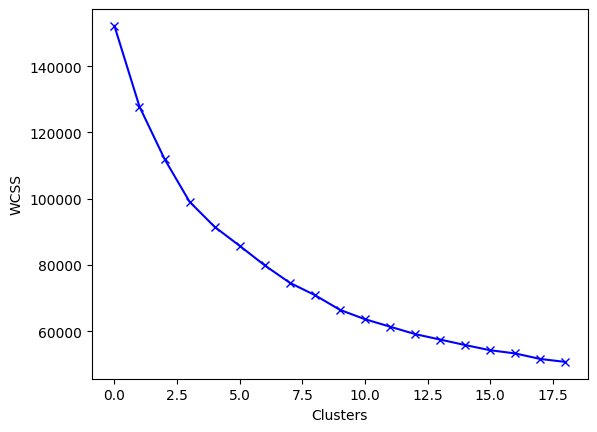

In [47]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

No gráfico acima podemos notar que a análise da possível quantidade ideal de clusters deve ficar entre 3 e 6, pois é justamente o ponto onde a diferença do WSS diminui de forma menos significante.

In [48]:
# Gerando Silhouette Score para cada n clusters

for n_clusters in range(2, 21):
  # Agrupar os dados
  kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
  kmeans.fit(compact)
  labels = kmeans.labels_

  # Avaliar o desempenho
  silhouette_avg = silhouette_score(compact, labels)

  print("Número de clusters:", n_clusters)
  print("Silhouette Score:", silhouette_avg, "\n")


Número de clusters: 2
Silhouette Score: 0.5917186 

Número de clusters: 3
Silhouette Score: 0.38299552 

Número de clusters: 4
Silhouette Score: 0.22811659 

Número de clusters: 5
Silhouette Score: 0.2380771 

Número de clusters: 6
Silhouette Score: 0.26737726 

Número de clusters: 7
Silhouette Score: 0.24532904 

Número de clusters: 8
Silhouette Score: 0.25550845 

Número de clusters: 9
Silhouette Score: 0.19915062 

Número de clusters: 10
Silhouette Score: 0.20875338 

Número de clusters: 11
Silhouette Score: 0.1988369 

Número de clusters: 12
Silhouette Score: 0.19617325 

Número de clusters: 13
Silhouette Score: 0.18570156 

Número de clusters: 14
Silhouette Score: 0.19378203 

Número de clusters: 15
Silhouette Score: 0.19125767 

Número de clusters: 16
Silhouette Score: 0.19627401 

Número de clusters: 17
Silhouette Score: 0.20157108 

Número de clusters: 18
Silhouette Score: 0.20107728 

Número de clusters: 19
Silhouette Score: 0.2050243 

Número de clusters: 20
Silhouette Score:

Pelo Silhouette Score temos a melhor pontuação com apenas 2 clusters, porém para o objetivo do modelo, que é auxiliar o departamento de marketing na segmentação de clientes, é pouco, assim como 3 clusters. Decidi seguir com 6 clusters por ter um score levemente melhor que 4

## Agrupamento com K-means

In [56]:
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42)
kmeans.fit(compact)

KMeans(n_clusters=6, n_init=10, random_state=42)

In [57]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([ 887, 4855,  444, 2733,   31]))

In [58]:
labels = kmeans.labels_
labels, labels.shape

(array([4, 1, 4, ..., 0, 0, 0], dtype=int32), (8950,))

In [59]:
# Médias dos atributos em cada cluster

kmeans.cluster_centers_

array([[ 0.9500139 ,  1.459302  ,  0.37940833,  1.84203   ,  0.5685591 ,
         0.        ,  0.5869585 ,  0.43137816,  0.38191965,  0.883347  ],
       [ 0.83719975,  1.2317775 ,  0.46638325,  1.0797793 ,  1.42983   ,
         0.        ,  0.3697035 ,  1.9332812 ,  2.1844485 ,  0.84045327],
       [ 2.876777  ,  1.750127  ,  3.6982484 ,  1.8220972 ,  3.327475  ,
         0.        ,  2.8478575 ,  3.1821744 ,  3.252999  ,  2.8995543 ],
       [ 3.3707714 ,  4.5416455 , 15.034901  ,  4.7420588 ,  6.826631  ,
         0.        ,  5.4283037 ,  5.2524066 ,  2.7782207 ,  8.0209255 ],
       [ 0.6498097 ,  0.51928496,  0.32845885,  0.5133957 ,  0.6321184 ,
         0.        ,  0.41808847,  0.4306559 ,  0.43256608,  0.4403001 ],
       [ 1.6721637 ,  1.243539  ,  1.8113084 ,  0.6356104 ,  0.73545915,
         0.        ,  1.3499801 ,  1.1275979 ,  0.8933922 ,  1.3954039 ]],
      dtype=float32)

In [60]:
# Vamos concatenar os clusters com cada cliente

df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


In [61]:
# Análise das médias agrupadas por cluster
mean_by_cluster = df_cluster_at.groupby('cluster').mean().transpose()
mean_by_cluster

cluster,0,1,2,3,4,5
BALANCE,284.935530,4725.360715,4976.112822,5390.764211,1317.790774,1538.711890
BALANCE_FREQUENCY,0.504249,0.958351,0.950764,0.941736,0.958551,0.970598
PURCHASES,412.627368,596.672917,6708.723736,28488.635455,484.958886,3201.617037
ONEOFF_PURCHASES,217.504428,390.171587,4110.221839,22091.886364,237.305871,2003.296697
INSTALLMENTS_PURCHASES,195.558057,206.579452,2598.628333,6396.749091,247.902036,1198.870798
CASH_ADVANCE,491.990136,4801.636209,4338.304610,1014.206401,537.439112,260.796956
PURCHASES_FREQUENCY,0.376038,0.344073,0.801382,0.878030,0.444011,0.938671
ONEOFF_PURCHASES_FREQUENCY,0.087964,0.180786,0.550965,0.797727,0.133975,0.648157
PURCHASES_INSTALLMENTS_FREQUENCY,0.275141,0.216620,0.685656,0.668939,0.333175,0.705037
CASH_ADVANCE_FREQUENCY,0.068621,0.483162,0.218832,0.041667,0.116044,0.040067


Com os clientes devidamente agrupados a equipe de marketing poderá analisar os perfis e assim tomar decisões para definição de estratégias de campanhas mais aderentes a cada grupo. Como por exemplo, fomentar o uso do cartão oferecendo cashback para os clientes do grupo 0, que tem menor frequência de compra. Aumentar ainda mais o limite do grupo 5, que tem maior frequência de compras, porém com valor não tão alto quanto o grupo 3.

## Aplicação de PCA (principal component analysis) e visualização dos resultados

In [62]:
# Aplicação da técnica de PCA para reduzir a dimensionalidade dos registros
# de 6 para 2 atributos, facilitando a visualização do gráfico de dispersão
# dos grupos


pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.404887,-0.260418
1,0.209571,1.161373
2,-0.127857,0.053497
3,-0.572130,-0.036093
4,-1.317139,-0.200167


In [63]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.404887,-0.260418,4
1,0.209571,1.161373,1
2,-0.127857,0.053497,4
3,-0.572130,-0.036093,4
4,-1.317139,-0.200167,4


<Axes: xlabel='pca1', ylabel='pca2'>

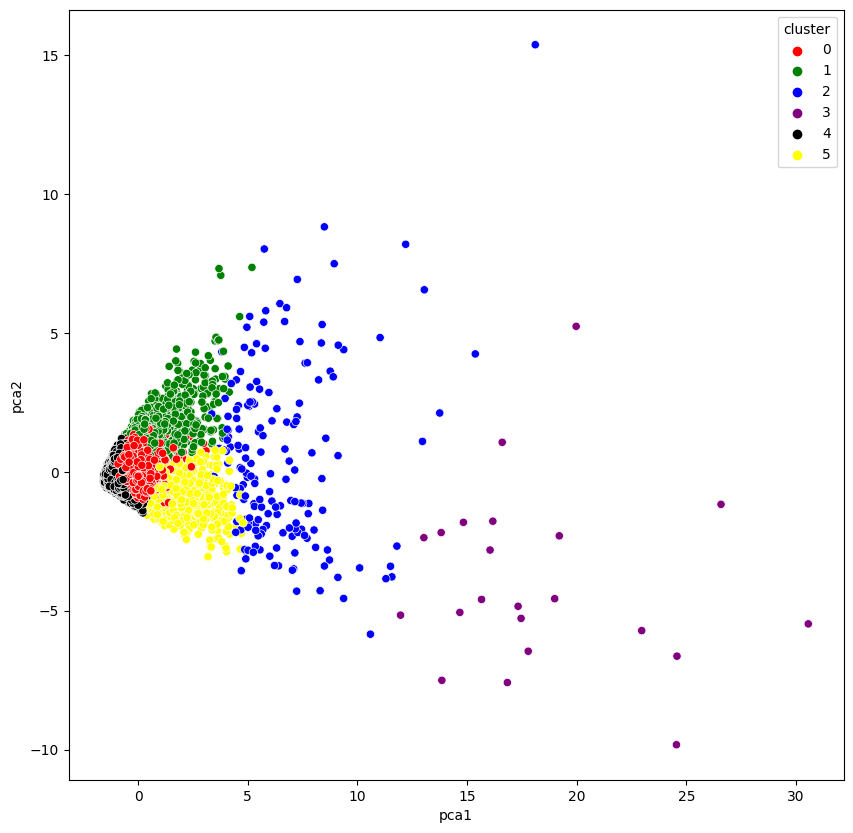

In [65]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'purple', 'black', 'yellow'])

Podemos concluir, pela visualização do último gráfico e pelo score de silhueta, que com a aplicação da técnica de autoencoders (com pouca perda de informação) obtivemos grupos satisfatoriamente bem definidos.

In [66]:
# Criando dataFrame para envio dos grupos ordenados para o departamento de marketing.

df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
8949,372.708075,0.666667,1093.25,1093.25,0.0,127.040008,0.666667,0.666667,0.00,0.333333,2,23,1200.0,63.165404,88.288956,0.000000,6,0
7082,0.000000,0.000000,207.00,0.00,207.0,0.000000,1.000000,0.000000,1.00,0.000000,0,12,2500.0,0.000000,864.206542,0.000000,12,0
7083,11.441738,0.363636,93.60,0.00,93.6,0.000000,0.250000,0.000000,0.25,0.000000,0,3,1900.0,603.723258,130.224347,0.250000,12,0
2438,22.523964,0.428571,346.30,0.00,346.3,0.000000,1.000000,0.000000,1.00,0.000000,0,7,1800.0,340.376582,74.812454,1.000000,7,0
2435,60.521240,0.800000,469.00,0.00,469.0,0.000000,0.600000,0.000000,0.50,0.000000,0,6,1000.0,541.359082,115.030520,0.833333,10,0


In [68]:
# Exportando o dataframe para excel

df_cluster_ordered.to_excel('cluster_ordereded.xlsx')